## Chapter 8: Beyond Linear Models
### Section B: Logistic Regression and Poisson Regression
#### MA189 Statistics and Big Data in Birmingham (with R)
##### -- _Blazer Core: City as Classroom Series_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/)


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

In this section, we will learn about two types of regression models commonly used for data where the response variable is not continuous:
1. **Logistic Regression** - For binary or categorical outcomes.
2. **Poisson Regression** - For count data.

Both methods extend the linear model framework to accommodate different types of dependent variables and can handle cases where linear regression is not appropriate.

#### <div class="alert alert-block alert-success"> Objectives </div>
1. Understand when to use logistic regression and how to fit and interpret a logistic regression model in R.
2. Understand when to use Poisson regression and how to fit and interpret a Poisson regression model in R.
Apply these methods to real data for hands-on practice.

#### <div class="alert alert-block alert-success"> Converting Variables</div>

Before building models, we often need to convert variables between different types. For logistic regression, the response variable should be binary, while predictors can be numeric or factors.

Here’s how to convert variables in R:

- **Numeric/Character to Factor**: `as.factor()`
- **Factor to Numeric**: `as.numeric()`
- **Factor to Character**: `as.character()`

In [3]:
# Convert the binary response variable to a factor
mtcars$high_mpg <- ifelse(mtcars$mpg > 20, "High", "Low")
mtcars$high_mpg <- as.factor(mtcars$high_mpg)  # Convert to factor

# Check conversion
str(mtcars$high_mpg)

# Convert a predictor to factor, if needed
mtcars$cyl <- as.factor(mtcars$cyl)
str(mtcars$cyl)

# Convert back to numeric if needed
cyl_numeric <- as.numeric(mtcars$cyl)
str(mtcars$cyl)

 Factor w/ 2 levels "High","Low": 1 1 1 1 2 2 2 1 1 2 ...
 Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...


#### <div class="alert alert-block alert-success"> Generating Model Matrix with Factors </div>

To create a **model matrix** for logistic regression with factors, we can use the `model.matrix()` function. This function automatically converts factors to dummy variables (one-hot encoding).

For instance, suppose we want to build a logistic model with `cyl` as a factor.

In [4]:
# Create a model matrix with factor variables
model_matrix <- model.matrix(high_mpg ~ wt + hp + cyl, data = mtcars)

# View the generated matrix
head(model_matrix)

,(Intercept),wt,hp,cyl6,cyl8
Mazda RX4,1,2.620,110,1,0
Mazda RX4 Wag,1,2.875,110,1,0
Datsun 710,1,2.320,93,0,0
Hornet 4 Drive,1,3.215,110,1,0
Hornet Sportabout,1,3.440,175,0,1
Valiant,1,3.460,105,1,0


### <div class="alert alert-block alert-success"> Logistic Regression </div>

Logistic regression is used when the response variable is **binary** (e.g., yes/no, success/failure). Instead of modeling the response as a linear function, we model the **log-odds** of the response as a linear function of the predictors.

#### Logistic Regression Equation
The logistic regression model for a binary outcome $Y$ is:
$$
\text{logit}(P(Y=1)) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p
$$
where:
- $P(Y=1)$ is the probability that the response equals 1.
- $\text{logit}(P) = \log\left(\frac{P}{1 - P}\right)$ is the log-odds.

We'll demonstrate logistic regression using the `mtcars` dataset by creating a binary outcome variable, `high_mpg`, which indicates if a car has high fuel efficiency.

In [6]:
# Load necessary library
library(ggplot2)

# Create a binary outcome variable for high mpg (fuel efficiency)
mtcars$high_mpg <- ifelse(mtcars$mpg > 20, 1, 0)

# Preview the modified dataset
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,high_mpg
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,1
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,1
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,0
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,0


#### <div class="alert alert-block alert-success"> Fitting a Logistic Regression Model </div>

We'll fit a logistic regression model to predict `high_mpg` based on the weight (`wt`) and horsepower (`hp`) of the cars. The `glm()` function in R with `family = binomial` is used for logistic regression.

In [47]:
# Fit logistic regression model
logistic_model <- glm(high_mpg ~ wt + hp, data = mtcars, family = binomial)

# Summary of the logistic regression model
summary(logistic_model)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ wt + hp, family = binomial, data = mtcars)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-6.743e-05  -2.100e-08  -2.100e-08   2.100e-08   7.480e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)    894.228 365884.162   0.002    0.998
wt            -202.865  84688.218  -0.002    0.998
hp              -2.021    858.062  -0.002    0.998

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.3860e+01  on 31  degrees of freedom
Residual deviance: 1.1156e-08  on 29  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 25


#### <div class="alert alert-block alert-info"> Interpreting Logistic Regression Results </div>

The logistic regression model output includes coefficients for `wt` and `hp`. Here’s how to interpret the results:
1. **Coefficients**: Each coefficient represents the log-odds of `high_mpg` for a one-unit increase in the predictor, holding other predictors constant.
2. **Odds Ratios**: By exponentiating the coefficients, we obtain the odds ratios, which indicate the multiplicative change in odds for each unit increase in the predictor.

In [55]:
exp(coef(logistic_model))

(Intercept)           wt           hp 
         Inf 7.884361e-89 1.325092e-01

The p-values for wt and hp are high because the standard errors of the coefficients are extremely large. This happens due to complete separation, where the model tries to fit the data almost exactly, leading to large (and unreliable) coefficient estimates. This often results in coefficients diverging towards infinity or being highly inflated.

#### <div class="alert alert-block alert-success"> Making Predictions with Logistic Regression </div>

Once the model is fit, we can use it to make predictions. Logistic regression outputs the probability of the outcome being 1, which we can threshold to predict binary outcomes.

In [9]:
# Predict probabilities of high mpg
predicted_probs <- predict(logistic_model, type = "response")

# Add predictions to the dataset
mtcars$predicted_high_mpg <- ifelse(predicted_probs > 0.5, 1, 0)

# Display the first few rows with predictions
head(mtcars[, c("mpg", "wt", "hp", "high_mpg", "predicted_high_mpg")])

,mpg,wt,hp,high_mpg,predicted_high_mpg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,2.620,110,1,1
Mazda RX4 Wag,21.0,2.875,110,1,1
Datsun 710,22.8,2.320,93,1,1
Hornet 4 Drive,21.4,3.215,110,1,1
Hornet Sportabout,18.7,3.440,175,0,0
Valiant,18.1,3.460,105,0,0


In [49]:
mse <- mean((mtcars$high_mpg - predicted_probs)^2)
cat("Training MSE:", mse, "\n")

Training MSE: 4.141339e-19 


In [56]:
table(mtcars$high_mpg, mtcars$wt > 3)

   
    FALSE TRUE
  0     1   17
  1    11    3

#### <div class="alert alert-block alert-success"> Adding Higher-Order Terms and Interactions </div>

Higher-order terms (like squared terms) and interactions can capture complex relationships between variables.

1. **Higher-Order Terms**: To include polynomial terms, simply add the squared or cubed terms in the formula.
2. **Interactions**: Use `:` for interaction terms (e.g., `wt:hp`), or `*` to include both individual and interaction terms (e.g., `wt * hp`).


In [21]:
# Include interaction in the model
model2 <- glm(high_mpg ~ wt + hp + wt:hp, family = binomial, data = mtcars)
summary(model2)
head(model.matrix(model2))

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ wt + hp + wt:hp, family = binomial, 
    data = mtcars)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.217e-05  -2.100e-08  -2.100e-08   2.100e-08   4.947e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   1376.310 847009.895   0.002    0.999
wt            -384.770 240635.444  -0.002    0.999
hp              -7.017   4404.678  -0.002    0.999
wt:hp            1.847   1187.706   0.002    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.3860e+01  on 31  degrees of freedom
Residual deviance: 4.7507e-09  on 28  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25


,(Intercept),wt,hp,wt:hp
Mazda RX4,1,2.620,110,288.20
Mazda RX4 Wag,1,2.875,110,316.25
Datsun 710,1,2.320,93,215.76
Hornet 4 Drive,1,3.215,110,353.65
Hornet Sportabout,1,3.440,175,602.00
Valiant,1,3.460,105,363.30


In [22]:
model3 <- glm(high_mpg ~ wt:hp, family = binomial, data = mtcars)
summary(model3)
head(model.matrix(model3))

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ wt:hp, family = binomial, data = mtcars)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.194e-04  -2.100e-08  -2.100e-08   2.100e-08   2.298e-04  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   1299.821 200677.927   0.006    0.995
wt:hp           -3.626    560.110  -0.006    0.995

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.3860e+01  on 31  degrees of freedom
Residual deviance: 1.0096e-07  on 30  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


,(Intercept),wt:hp
Mazda RX4,1,288.20
Mazda RX4 Wag,1,316.25
Datsun 710,1,215.76
Hornet 4 Drive,1,353.65
Hornet Sportabout,1,602.00
Valiant,1,363.30


In [23]:
model4 <- glm(high_mpg ~ wt + hp + wt*hp, family = binomial, data = mtcars)
summary(model4)
head(model.matrix(model4))

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ wt + hp + wt * hp, family = binomial, 
    data = mtcars)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.217e-05  -2.100e-08  -2.100e-08   2.100e-08   4.947e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   1376.310 847009.895   0.002    0.999
wt            -384.770 240635.444  -0.002    0.999
hp              -7.017   4404.678  -0.002    0.999
wt:hp            1.847   1187.706   0.002    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.3860e+01  on 31  degrees of freedom
Residual deviance: 4.7507e-09  on 28  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25


,(Intercept),wt,hp,wt:hp
Mazda RX4,1,2.620,110,288.20
Mazda RX4 Wag,1,2.875,110,316.25
Datsun 710,1,2.320,93,215.76
Hornet 4 Drive,1,3.215,110,353.65
Hornet Sportabout,1,3.440,175,602.00
Valiant,1,3.460,105,363.30


In [24]:
model5 <- glm(high_mpg ~ wt*hp, family = binomial, data = mtcars)
summary(model5)
head(model.matrix(model5))

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ wt * hp, family = binomial, data = mtcars)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.217e-05  -2.100e-08  -2.100e-08   2.100e-08   4.947e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   1376.310 847009.895   0.002    0.999
wt            -384.770 240635.444  -0.002    0.999
hp              -7.017   4404.678  -0.002    0.999
wt:hp            1.847   1187.706   0.002    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.3860e+01  on 31  degrees of freedom
Residual deviance: 4.7507e-09  on 28  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25


,(Intercept),wt,hp,wt:hp
Mazda RX4,1,2.620,110,288.20
Mazda RX4 Wag,1,2.875,110,316.25
Datsun 710,1,2.320,93,215.76
Hornet 4 Drive,1,3.215,110,353.65
Hornet Sportabout,1,3.440,175,602.00
Valiant,1,3.460,105,363.30


In [25]:
# Include interaction in the model
model.high1 <- glm(high_mpg ~ I(wt^2), family = binomial, data = mtcars)
summary(model.high1)
head(model.matrix(model.high1))


Call:
glm(formula = high_mpg ~ I(wt^2), family = binomial, data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1804  -0.3183  -0.0001   0.1102   1.4058  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  10.3523     4.3467   2.382   0.0172 *
I(wt^2)      -1.0521     0.4168  -2.524   0.0116 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.86  on 31  degrees of freedom
Residual deviance: 13.40  on 30  degrees of freedom
AIC: 17.4

Number of Fisher Scoring iterations: 8


,(Intercept),I(wt^2)
Mazda RX4,1,6.864400
Mazda RX4 Wag,1,8.265625
Datsun 710,1,5.382400
Hornet 4 Drive,1,10.336225
Hornet Sportabout,1,11.833600
Valiant,1,11.971600


In [26]:
model.high2 <- glm(high_mpg ~ I(wt^2) + wt, family = binomial, data = mtcars)
summary(model.high2)
head(model.matrix(model.high2))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ I(wt^2) + wt, family = binomial, data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2540  -0.2600   0.0000   0.1815   1.3433  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -6.669     22.628  -0.295    0.768
I(wt^2)       -3.010      2.952  -1.020    0.308
wt            11.633     16.432   0.708    0.479

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 13.068  on 29  degrees of freedom
AIC: 19.068

Number of Fisher Scoring iterations: 8


,(Intercept),I(wt^2),wt
Mazda RX4,1,6.864400,2.620
Mazda RX4 Wag,1,8.265625,2.875
Datsun 710,1,5.382400,2.320
Hornet 4 Drive,1,10.336225,3.215
Hornet Sportabout,1,11.833600,3.440
Valiant,1,11.971600,3.460


In [27]:
model.high3 <- glm(high_mpg ~ poly(wt,2,raw=TRUE), family = binomial, data = mtcars)
summary(model.high3)
head(model.matrix(model.high3))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ poly(wt, 2, raw = TRUE), family = binomial, 
    data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2540  -0.2600   0.0000   0.1815   1.3433  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                -6.669     22.628  -0.295    0.768
poly(wt, 2, raw = TRUE)1   11.633     16.432   0.708    0.479
poly(wt, 2, raw = TRUE)2   -3.010      2.952  -1.020    0.308

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 13.068  on 29  degrees of freedom
AIC: 19.068

Number of Fisher Scoring iterations: 8


,(Intercept),"poly(wt, 2, raw = TRUE)1","poly(wt, 2, raw = TRUE)2"
Mazda RX4,1,2.620,6.864400
Mazda RX4 Wag,1,2.875,8.265625
Datsun 710,1,2.320,5.382400
Hornet 4 Drive,1,3.215,10.336225
Hornet Sportabout,1,3.440,11.833600
Valiant,1,3.460,11.971600


In [28]:
model.high4 <- glm(high_mpg ~ poly(wt,2) , family = binomial, data = mtcars)
summary(model.high4)
head(model.matrix(model.high4))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ poly(wt, 2), family = binomial, data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2540  -0.2600   0.0000   0.1815   1.3433  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -3.191      2.663  -1.198   0.2308  
poly(wt, 2)1  -49.148     24.060  -2.043   0.0411 *
poly(wt, 2)2  -22.196     21.768  -1.020   0.3079  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 13.068  on 29  degrees of freedom
AIC: 19.068

Number of Fisher Scoring iterations: 8


,(Intercept),"poly(wt, 2)1","poly(wt, 2)2"
Mazda RX4,1,-0.1096309987,-0.04278415
Mazda RX4 Wag,1,-0.0628232889,-0.09005145
Datsun 710,1,-0.1646988925,0.03540332
Hornet 4 Drive,1,-0.0004130092,-0.12564085
Hornet Sportabout,1,0.0408879112,-0.13195337
Valiant,1,0.0445591041,-0.13185000


In [37]:
cor(model.matrix(model.high3)[,-1])
cor(model.matrix(model.high4)[,-1])

,"poly(wt, 2, raw = TRUE)1","poly(wt, 2, raw = TRUE)2"
"poly(wt, 2, raw = TRUE)1",1.0000000,0.9810937
"poly(wt, 2, raw = TRUE)2",0.9810937,1.0000000


,"poly(wt, 2)1","poly(wt, 2)2"
"poly(wt, 2)1",1.000000e+00,1.621966e-16
"poly(wt, 2)2",1.621966e-16,1.000000e+00


#### <div class="alert alert-block alert-success"> Using Splines for Non-linear Relationships </div>

Splines allow us to model non-linear relationships by breaking the data into segments and fitting separate lines for each segment. The `splines` package in R provides functions like `ns()` for natural splines.

In [38]:
# Load the splines package
library(splines)

# Fit a logistic model with a spline term for hp
logistic_spline_model <- glm(high_mpg ~ wt + ns(hp, df = 3), family = binomial, data = mtcars)

# Summary of the model with splines
summary(logistic_spline_model)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = high_mpg ~ wt + ns(hp, df = 3), family = binomial, 
    data = mtcars)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-5.362e-05  -2.100e-08  -2.100e-08   2.100e-08   5.729e-05  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        602.318 309484.154   0.002    0.998
wt                -184.261  95439.108  -0.002    0.998
ns(hp, df = 3)1   -262.794 152169.318  -0.002    0.999
ns(hp, df = 3)2    -43.456 169265.989   0.000    1.000
ns(hp, df = 3)3      5.875 222511.809   0.000    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.3860e+01  on 31  degrees of freedom
Residual deviance: 6.9427e-09  on 27  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


In [39]:
cor(model.matrix(logistic_spline_model)[,-1])

,wt,"ns(hp, df = 3)1","ns(hp, df = 3)2","ns(hp, df = 3)3"
wt,1.0000000,0.6968773,0.1904012,0.2181584
"ns(hp, df = 3)1",0.6968773,1.0000000,-0.1202191,0.2713483
"ns(hp, df = 3)2",0.1904012,-0.1202191,1.0000000,-0.5217944
"ns(hp, df = 3)3",0.2181584,0.2713483,-0.5217944,1.0000000


#### <div class="alert alert-block alert-success"> Penalized Logistic Regression (Lasso, Ridge, Elastic Net) </div>

For logistic regression with high-dimensional data, **penalization** techniques (Lasso, Ridge, and Elastic Net) can help by shrinking coefficients, reducing model complexity, and performing variable selection.

1. **Lasso (L1 penalty)**: Adds an absolute penalty, shrinking some coefficients to zero.
2. **Ridge (L2 penalty)**: Adds a squared penalty, shrinking coefficients but retaining all variables.
3. **Elastic Net**: Combines L1 and L2 penalties, balancing Ridge and Lasso effects.

In [41]:
# Load necessary libraries
library(glmnet)

# Prepare data for glmnet (model matrix and response as numeric)
x <- model.matrix(high_mpg ~ wt + hp + cyl, data = mtcars)[, -1]
y <- as.numeric(mtcars$high_mpg) - 1  # Convert to binary 0/1 for glmnet

# Fit Lasso logistic regression (alpha = 1)
lasso_model <- cv.glmnet(x, y, family = "binomial", alpha = 1)

# Fit Ridge logistic regression (alpha = 0)
ridge_model <- cv.glmnet(x, y, family = "binomial", alpha = 0)

# Fit Elastic Net logistic regression (alpha = 0.5)
elastic_net_model <- cv.glmnet(x, y, family = "binomial", alpha = 0.5)

# Optimal lambda values
cat("Lasso optimal lambda:", lasso_model$lambda.min, "\n")
cat("Ridge optimal lambda:", ridge_model$lambda.min, "\n")
cat("Elastic Net optimal lambda:", elastic_net_model$lambda.min, "\n")

Loading required package: Matrix

Loaded glmnet 4.1-8



Lasso optimal lambda: 0.001749732 
Ridge optimal lambda: 0.03858387 
Elastic Net optimal lambda: 0.001824623 


In [46]:
summary(model)$coefficients[, "Std. Error"]

(Intercept)          wt          hp        drat 
6.156303365 0.796398312 0.008924543 1.226982656

#### <div class="alert alert-block alert-success"> Visualizing Logistic Regression Predictions </div>

Visualization can help interpret logistic regression by showing predicted probabilities for different values of predictors.

We’ll use `ggplot2` to visualize predicted probabilities for `high_mpg` based on `wt`.

`geom_smooth()` using formula = 'y ~ x'


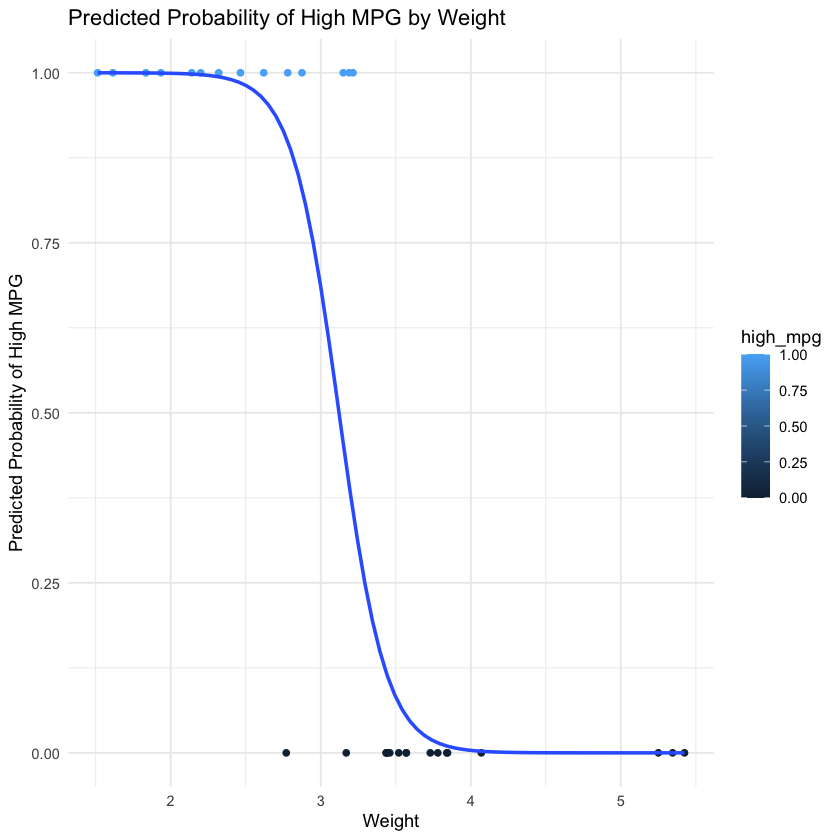

In [44]:
# Load ggplot2
library(ggplot2)

# Generate predicted probabilities for logistic regression model
mtcars$predicted_prob <- predict(logistic_model, type = "response")

# Plot predicted probabilities by weight (wt)
ggplot(mtcars, aes(x = wt, y = predicted_prob)) +
  geom_point(aes(color = high_mpg)) +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(title = "Predicted Probability of High MPG by Weight",
       x = "Weight", y = "Predicted Probability of High MPG") +
  theme_minimal()

### <div class="alert alert-block alert-success"> Poisson Regression </div>

Poisson regression is used when the response variable represents **count data** (e.g., number of occurrences of an event). Instead of modeling the response as a linear function, we model the **log of the expected count** as a linear function of the predictors.

#### Poisson Regression Equation
The Poisson regression model for a count outcome $Y$ is:
$$
\log(\lambda) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p
$$
where:
- $\lambda$ is the expected count for a given set of predictor values.
- The log link function ensures that predicted counts are positive.

We'll use a hypothetical count variable `gear_counts` in `mtcars` for demonstration purposes, assuming it represents the number of certain car types (e.g., gears) observed in a sample.

In [8]:
# Create a count outcome variable (hypothetical) for demonstration
set.seed(42)
mtcars$gear_counts <- rpois(n = nrow(mtcars), lambda = 2)

# Preview the modified dataset
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,high_mpg,predicted_high_mpg,gear_counts
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,1,1,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,1,1,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,1,1,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,1,1,3
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,0,0,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,0,0,2


#### <div class="alert alert-block alert-success"> Fitting a Poisson Regression Model </div>

We'll fit a Poisson regression model to predict `gear_counts` based on weight (`wt`) and horsepower (`hp`). The `glm()` function in R with `family = poisson` is used for Poisson regression.

In [11]:
# Fit Poisson regression model
poisson_model <- glm(gear_counts ~ wt + hp, data = mtcars, family = poisson)

# Summary of the Poisson regression model
summary(poisson_model)


Call:
glm(formula = gear_counts ~ wt + hp, family = poisson, data = mtcars)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.34067  -0.66939  -0.02538   0.44991   1.82550  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) 0.509590   0.395332   1.289    0.197
wt          0.033655   0.144177   0.233    0.815
hp          0.002107   0.001977   1.066    0.287

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 32.002  on 31  degrees of freedom
Residual deviance: 29.643  on 29  degrees of freedom
AIC: 118.11

Number of Fisher Scoring iterations: 5


#### <div class="alert alert-block alert-info"> Interpreting Poisson Regression Results </div>

The Poisson regression model output includes coefficients for `wt` and `hp`. Here’s how to interpret the results:
1. **Coefficients**: Each coefficient represents the log of the expected count change for a one-unit increase in the predictor, holding other predictors constant.
2. **Rate Ratios**: By exponentiating the coefficients, we obtain rate ratios, which indicate the multiplicative change in the expected count for each unit increase in the predictor.

#### R Code to Calculate Rate Ratios

In [12]:
# Exponentiate coefficients to get rate ratios
exp(coef(poisson_model))

(Intercept)          wt          hp 
   1.664608    1.034228    1.002109

### <div class="alert alert-block alert-danger"><b>Practice Exercise</b></div>

Now it’s your turn to practice logistic and Poisson regression techniques.

#### Logistic Regression
1. Choose a binary variable as your target, such as `high_mpg`.
2. Fit a logistic regression model with two predictors.
3. Interpret the coefficients and calculate the odds ratios.

#### Poisson Regression
1. Choose a count variable as your target, or create one similar to `gear_counts`.
2. Fit a Poisson regression model with two predictors.
3. Interpret the coefficients and calculate the rate ratios.

#### Questions to Consider:
- How do the logistic and Poisson regression models differ in interpretation?
- What real-life scenarios would be suited for logistic regression? For Poisson regression?

**Tip**: Use the example code above to guide your analysis. Try using other datasets to strengthen your understanding of these methods.